# Курсовой проект для курса "Python для Data Science"

Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Материалы к проекту (файлы):
train.csv
test.csv

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import math

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
TRAIN_DATASET_PATH = 'train.csv'

In [3]:
TEST_DATASET_PATH = 'test.csv'

### Загрузка данных

**Описание датасета:**
* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [4]:
train = pd.read_csv(TRAIN_DATASET_PATH)
train.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [5]:
test = pd.read_csv(TEST_DATASET_PATH)
test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            1.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199         B         B        11      2748   
1         1.0       1977   0.075779         B         B         6      1437   
2         5.0       1909   0.000000         B         B        30      7538   
3        22.0       2007   0.101872         B         B        23      4583   
4        17.0       2017   0.072158         B         B         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         1           NaN            0        0       B  
1         3           NaN            0        2       B  
2        87        4702.0            5        5       B  
3         3           NaN            3        3       B  
4         1           NaN            0        0       A

### Приведение типов данных

### Тренировочный набор

In [6]:
train.shape

(10000, 20)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [8]:
train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Количество комнат должно быть целым числом.

In [9]:
train['Rooms'].dtype

dtype('float64')

In [10]:
train['Rooms'] = train['Rooms'].astype('int64')

In [11]:
train['Rooms'].dtype

dtype('int64')

Количество этажей целочисленное значение.

In [12]:
train['HouseFloor'].dtype

dtype('float64')

In [13]:
train['HouseFloor'] = train['HouseFloor'].astype('int64')

In [14]:
train['HouseFloor'].dtype

dtype('int64')

Площадь кухни по факту есть целочисленное значение, что ни есть целочисленное значение, то есть выброс.

In [15]:
train['KitchenSquare'].dtype

dtype('float64')

In [16]:
train['KitchenSquare'] = train['KitchenSquare'].astype('int64')

In [17]:
train['KitchenSquare'].dtype

dtype('int64')

### Тестовый набор

In [18]:
test.shape

(5000, 19)

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [20]:
test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

Количество комнат должно быть целым числом.

In [21]:
test['Rooms'].dtype

dtype('float64')

In [22]:
test['Rooms'] = test['Rooms'].astype('int64')

In [23]:
test['Rooms'].dtype

dtype('int64')

Количество этажей целочисленное значение.

In [24]:
test['HouseFloor'].dtype

dtype('float64')

In [25]:
test['HouseFloor'] = test['HouseFloor'].astype('int64')

In [26]:
test['HouseFloor'].dtype

dtype('int64')

Площадь кухни по факту есть целочисленное значение, что ни есть целочисленное значение, то есть выброс.

In [27]:
test['KitchenSquare'].dtype

dtype('float64')

In [28]:
test['KitchenSquare'] = test['KitchenSquare'].astype('int64')

In [29]:
test['KitchenSquare'].dtype

dtype('int64')

Объединим оба набора для вычищения данных.

In [30]:
df = pd.concat((train, test), sort=False).reset_index(drop=True)

In [31]:
df.shape

(15000, 20)

### Статистика

In [32]:
df.describe()

Id    DistrictId         Rooms        Square    LifeSquare  \
count  15000.000000  15000.000000  15000.000000  15000.000000  11846.000000   
mean    8393.136933     50.693600      1.897000     56.360350     36.851792   
std     4850.111673     43.786257      0.839229     20.423913     71.120183   
min        0.000000      0.000000      0.000000      1.136859      0.333490   
25%     4188.750000     20.000000      1.000000     41.814371     22.896130   
50%     8378.500000     37.000000      2.000000     52.645757     32.822810   
75%    12594.250000     75.000000      2.000000     66.036608     45.144624   
max    16798.000000    212.000000     19.000000    641.065193   7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   15000.000000  15000.000000  15000.000000  1.500000e+04  15000.000000   
mean        6.174467      8.561800     12.606600  3.321575e+03      0.119196   
std        24.016979      5.323113      6.780165  1.637078e+05      0.119371   
min         0.000000      1.000000      0.000000  1.908000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     12.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     78.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  15000.000000  15000.000000  15000.000000   7825.000000  15000.000000   
mean      24.769267   5370.404933      8.113667   1144.162428      1.319467   
std       17.532278   4013.364403     23.841946   1029.296278      1.489012   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7287.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  15000.000000   10000.000000  
mean       4.235133  214138.857399  
std        4.796545   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

### Обзор количественных переменных

In [33]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35      2  47.981561   29.442751              6      7   
1  15053          41      3  65.683640   40.049543              8      7   
2   4765          53      2  44.947953   29.197612              0      8   
3   5809          58      2  53.352981   52.731512              9      8   
4  10783          99      1  39.649192   23.776169              7     11   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
0           9       1969   0.089040        33      7976         5   
1           9       1978   0.000070        46     10309         1   
2          12       1968   0.049637        34      7759         0   
3          17       1977   0.437885        23      5735         3   
4          12       1976   0.012339        35      5776         1   

   Healthcare_1  Helthcare_2  Shops_1          Price  
0           NaN            0       11  184966.930730  
1         240.0            1       16  300009.450063  
2         229.0            1        3  220925.908524  
3        1084.0            0        5  175616.227217  
4        2078.0            2        4  150226.531644

### Обзор номинативных переменных

In [34]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

Ecology_2 Ecology_3 Shops_2
0         B         B       B
1         B         B       B
2         B         B       B
3         B         B       B
4         B         B       B

In [35]:
df['Ecology_2'].value_counts()

B    14855
A      145
Name: Ecology_2, dtype: int64

In [36]:
df['Ecology_3'].value_counts()

B    14576
A      424
Name: Ecology_3, dtype: int64

In [37]:
df['Shops_2'].value_counts()

B    13763
A     1237
Name: Shops_2, dtype: int64

### Обработка пропусков

In [38]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       3154
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     7175
Helthcare_2         0
Shops_1             0
Shops_2             0
Price            5000
dtype: int64

**LifeSquare**

Поскольку пустых значений слишком много, то рассмотрим их в зависимости от срезов по количеству комнат и по годам и заполним значениями медианы по этим срезам.

In [39]:
df['Rooms'][df['LifeSquare'].isnull()].value_counts()

1    1285
2    1271
3     577
4      15
0       3
5       2
6       1
Name: Rooms, dtype: int64

In [40]:
df['HouseYear'][df['LifeSquare'].isnull()].value_counts()

1977    2757
2016     102
2015      89
2017      87
2014      62
2018      33
2013      11
2019      10
2020       2
2012       1
Name: HouseYear, dtype: int64

In [41]:
for room in df['Rooms'][df['LifeSquare'].isnull()].unique():
    for year in df['HouseYear'][df['LifeSquare'].isnull()].unique():
        df.loc[df['LifeSquare'].isnull() & (df['Rooms'] == room) & (df['HouseYear'] == year), 'LifeSquare'] = df['LifeSquare'][df['LifeSquare'].notnull() & (df['Rooms'] == room) & (df['HouseYear'] == year)].median()

In [42]:
df.loc[df['LifeSquare'].isnull()]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
3911     770          28      0   49.483501         NaN              0     16   
12071  10793          23      6  110.750226         NaN              0      2   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
3911            0       2015   0.118537         B         B        30   
12071           2       2015   0.014073         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
3911       6207         1        1183.0            1        0       B   
12071       475         0           NaN            0        0       B   

               Price  
3911   217009.338463  
12071            NaN

Заполним оставшееся пустое значение в зависимости от среза по площади.

In [43]:
df.loc[df['Id'] == 770, 'LifeSquare'] = df.loc[df['Square'].between(49.0, 50.0), 'Rooms'].median()

In [44]:
df.loc[df['Id'] == 10793, 'LifeSquare'] = df.loc[df['Square'].between(100.0, 120.0), 'Rooms'].median()

**Healthcare_1**

"Раскидаем" пустые значения по имеющимся классам значений

Получим уникальные значения из выборки

In [45]:
values = list(df.loc[df['Healthcare_1'].notnull(), 'Healthcare_1'].unique())

In [46]:
values = sorted(values)

In [47]:
length = len(values)

In [48]:
length

79

In [49]:
values[:5]

[0.0, 30.0, 32.0, 35.0, 46.0]

In [50]:
values[length - 5:]

[4087.0, 4129.0, 4508.0, 4702.0, 4849.0]

In [51]:
b = df.loc[df['Healthcare_1'].isnull()]

In [52]:
for id in b['Id']:
    df.loc[df['Id'] == id, 'Healthcare_1'] = values[random.randint(0, length - 1)]

**Ecology_2**

In [53]:
df['Ecology_2'].mode()[0]

'B'

In [54]:
df.replace({'Ecology_2': {'-':df['Ecology_2'].mode()[0]}}, inplace=True)

In [55]:
df['Ecology_2'].value_counts()

B    14855
A      145
Name: Ecology_2, dtype: int64

**Ecology_3**

In [56]:
df['Ecology_3'].mode()[0]

'B'

In [57]:
df.replace({'Ecology_3': {'-':df['Ecology_3'].mode()[0]}}, inplace=True)

In [58]:
df['Ecology_3'].value_counts()

B    14576
A      424
Name: Ecology_3, dtype: int64

**Shops_2**

In [59]:
df['Shops_2'].mode()[0]

'B'

In [60]:
df.replace({'Shops_2': {'-':df['Shops_2'].mode()[0]}}, inplace=True)

In [61]:
df['Shops_2'].value_counts()

B    13763
A     1237
Name: Shops_2, dtype: int64

### Обработка выбросов

In [62]:
df.describe()

Id    DistrictId         Rooms        Square    LifeSquare  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    8393.136933     50.693600      1.897000     56.360350     38.524649   
std     4850.111673     43.786257      0.839229     20.423913     63.498418   
min        0.000000      0.000000      0.000000      1.136859      0.333490   
25%     4188.750000     20.000000      1.000000     41.814371     25.611946   
50%     8378.500000     37.000000      2.000000     52.645757     33.768078   
75%    12594.250000     75.000000      2.000000     66.036608     49.113026   
max    16798.000000    212.000000     19.000000    641.065193   7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   15000.000000  15000.000000  15000.000000  1.500000e+04  15000.000000   
mean        6.174467      8.561800     12.606600  3.321575e+03      0.119196   
std        24.016979      5.323113      6.780165  1.637078e+05      0.119371   
min         0.000000      1.000000      0.000000  1.908000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     12.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     78.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      24.769267   5370.404933      8.113667   1240.685200      1.319467   
std       17.532278   4013.364403     23.841946   1111.202486      1.489012   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000   1015.000000      1.000000   
75%       36.000000   7287.000000      5.000000   1894.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  15000.000000   10000.000000  
mean       4.235133  214138.857399  
std        4.796545   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

**Год застройки (HouseYear)**

In [63]:
df.sort_values(by="HouseYear", inplace=True)

In [64]:
df['HouseYear'].value_counts().head(11)

1977    3950
2016     477
2015     458
2017     449
2014     308
1970     305
1969     272
1972     271
1974     263
1971     262
1973     250
Name: HouseYear, dtype: int64

In [65]:
df['HouseYear'].head()

13253    1908
10002    1909
9317     1910
12691    1910
10064    1911
Name: HouseYear, dtype: int64

In [66]:
df['HouseYear'].tail()

790          2020
14389        2020
4376         2020
4189         4968
1497     20052011
Name: HouseYear, dtype: int64

Последние два значения сильно выпадают из общей выборки, предположим, что оператор ошибся.

In [67]:
df.replace({'HouseYear': {4968:1968}}, inplace=True)

In [68]:
df.replace({'HouseYear': {20052011:2005}}, inplace=True)

In [69]:
df.sort_values(by="HouseYear", inplace=True)

In [70]:
df['HouseYear'].tail(5)

585      2020
10385    2020
6735     2020
14273    2020
918      2020
Name: HouseYear, dtype: int64

In [71]:
target_mean = round(df['HouseYear'].mean(), 2)
target_median = df['HouseYear'].median()
target_mode = df['HouseYear'].mode()[0]

target_mean, target_median, target_mode

(1984.71, 1977.0, 1977)

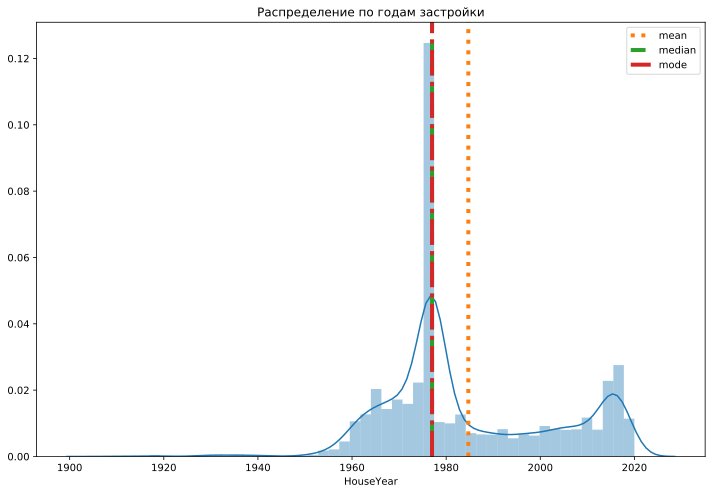

In [72]:
plt.figure(figsize = (12, 8))
sns.distplot(df.loc[df['HouseYear'].notnull(), 'HouseYear'])

y = np.linspace(0, 1, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Распределение по годам застройки')
plt.legend()
plt.show()

Из графика видно, что очень сильный выброс приходится на 1977 год.

In [73]:
id_list = list(df['Id'][df['HouseYear'] == 1977].unique())

In [74]:
for id in id_list:
    house_floor = list(df['HouseFloor'][df['Id'] == id])[0]
    square = round(list(df['Square'][df['Id'] == id])[0])
    result = df['HouseYear'][(df['HouseYear'] != 1977) & (df['HouseFloor'] == house_floor) & (round(df['Square']) == square)].median()
    if pd.notnull(result):
        df.loc[df['Id'] == id, 'HouseYear'] = int(result)

In [75]:
target_mean = round(df['HouseYear'].mean())
target_median = round(df['HouseYear'].median())
target_mode = round(df['HouseYear'].mode()[0])

target_mean, target_median, target_mode

(1991, 1992, 2015)

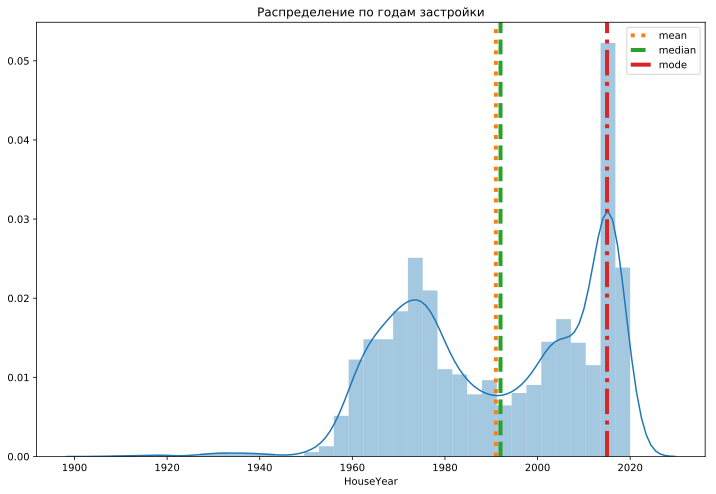

In [76]:
plt.figure(figsize = (12, 8))
sns.distplot(df.loc[df['HouseYear'].notnull(), 'HouseYear'])

y = np.linspace(0, 1, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Распределение по годам застройки')
plt.legend()
plt.show()

**Этажность дома (HouseFloor)**

Отсортируем по этажности

In [77]:
df.sort_values(by="HouseFloor", inplace=True)

In [78]:
df['HouseFloor'].head()

12216    0
7031     0
14892    0
14840    0
6778     0
Name: HouseFloor, dtype: int64

In [79]:
df['HouseFloor'].tail()

13909     48
10651     99
8599      99
6131      99
8854     117
Name: HouseFloor, dtype: int64

In [80]:
df['HouseFloor'].value_counts().head(11)

17    3482
9     2113
12    1600
5     1581
14     969
16     811
1      727
25     553
22     536
0      400
24     274
Name: HouseFloor, dtype: int64

Очень много домов с этажностью 0. Есть четыре высотных дома 1977 года постройки, этажность которых превышает 50 этажей. Будем считать это выбросами и заменим их медианными занчениями. Самая "ходовая" этажность: 5, 9, 12, 17 этажей.

In [81]:
df.loc[df['Id'] == 15864, 'HouseFloor'] = 9

In [82]:
df.loc[df['Id'] == 9300, 'HouseFloor'] = 9

In [83]:
df.loc[df['Id'] == 10806, 'HouseFloor'] = 9

In [84]:
df.loc[df['Id'] == 78, 'HouseFloor'] = 17

In [85]:
id_list = list(df['Id'][(df['HouseFloor'] == 0) | (df['HouseFloor'] < df['Floor'])].unique())

In [86]:
for id in id_list:
    house_floor = list(df['HouseFloor'][df['Id'] == id])[0]
    floor = list(df['Floor'][df['Id'] == id])[0]
    year = list(df['HouseYear'][df['Id'] == id])[0]
    
    result = df['HouseFloor'][(df['HouseFloor'] != 0) & (df['HouseYear'] == year) & (df['HouseFloor'] >= floor)].median()
    if pd.notnull(result):
        df.loc[df['Id'] == id, 'HouseFloor'] = int(result)

In [87]:
id_list = list(df['Id'][df['HouseFloor'] < df['Floor']].unique())

In [88]:
for id in id_list:
    df.loc[df['Id'] == id, 'HouseFloor'] = df.loc[df['Id'] == id, 'Floor']

In [89]:
df.loc[df['Id'] == 15759, 'HouseFloor'] = 9

In [90]:
df.loc[df['Id'] == 15759, 'Floor'] = 9

In [91]:
house_floor_target_mean = round(df['HouseFloor'].mean())
house_floor_target_median = round(df['HouseFloor'].median())
house_floor_target_mode = round(df['HouseFloor'].mode()[0])

house_floor_target_mean, house_floor_target_median, house_floor_target_mode

(14, 16, 17)

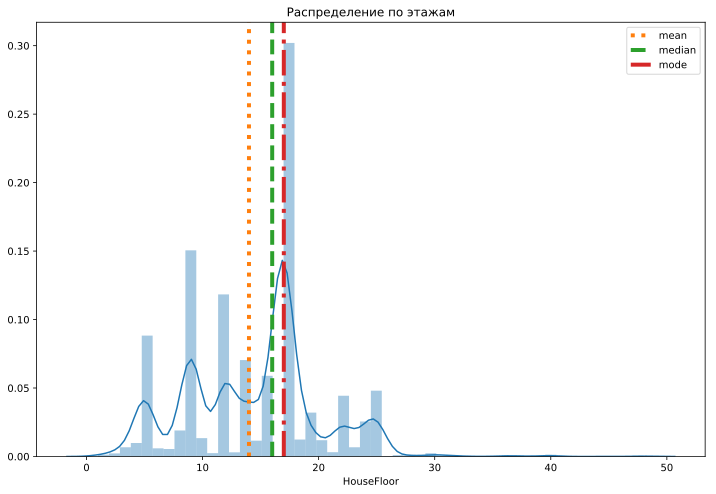

In [92]:
plt.figure(figsize = (12, 8))
sns.distplot(df['HouseFloor'])

y = np.linspace(0, 1, 100)
plt.plot([house_floor_target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([house_floor_target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([house_floor_target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Распределение по этажам')
plt.legend()
plt.show()

**Количество комнат (Rooms)**

In [93]:
df['Rooms'].unique()

array([ 3,  2,  1,  4,  0,  5,  6, 10, 19, 17], dtype=int64)

Очевидно, что 0 комнат нет, а 6, 10 и 19 комнат это какие-то выбросы, проверим и приведем их к нормальному значению по площади.

In [94]:
df.loc[df['Rooms'] == 0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
4853    3224          27      0    2.377248    0.873147              0      1   
2269    7317          27      0   41.790881   63.973134              0     13   
12524  10729          27      0   76.345154   42.820796             12     14   
3911     770          28      0   49.483501    2.000000              0     16   
4366     456           6      0   81.491446   63.973134              0      4   
1981    7917          27      0  212.932361  211.231125              0      2   
12406   3343          58      0  116.824201  113.692424              0      3   
1397   12638          27      0  138.427694  136.215499              0      4   
8834    9443          27      0   87.762616   85.125471              0      5   
6149    3159          88      0   38.697117   19.345131              9      9   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4853           11       1977   0.017647         B         B         2   
2269           17       2016   0.211401         B         B         9   
12524          19       1977   0.017647         B         B         2   
3911           17       2015   0.118537         B         B        30   
4366           19       1977   0.243205         B         B         5   
1981            3       2008   0.211401         B         B         9   
12406           3       1977   0.437885         B         B        23   
1397           17       2016   0.075424         B         B        11   
8834           15       1977   0.211401         B         B         9   
6149           16       1982   0.127376         B         B        43   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4853        469         0         750.0            0        0       B   
2269       1892         0        1036.0            0        1       B   
12524       469         0        1994.0            0        0       B   
3911       6207         1        1183.0            1        0       B   
4366       1564         0         540.0            0        0       B   
1981       1892         0         200.0            0        1       B   
12406      5735         3        1084.0            0        5       B   
1397       3097         0         165.0            0        0       B   
8834       1892         0         192.0            0        1       B   
6149       8429         3        4508.0            3        9       B   

               Price  
4853   126596.941798  
2269    98129.976788  
12524            NaN  
3911   217009.338463  
4366   212864.799112  
1981   302211.260887  
12406            NaN  
1397   268394.744389  
8834   219281.918007  
6149   158998.110646

In [95]:
df.loc[(df['Rooms'] == 0.0) & (df['Square'] < 45.0), 'Rooms'] = 1

In [96]:
df.loc[(df['Rooms'] == 0.0) & df['Square'].between(45.0, 65.0), 'Rooms'] = 2

In [97]:
df.loc[(df['Rooms'] == 0.0) & df['Square'].between(65.0, 85.0), 'Rooms'] = 3

In [98]:
df.loc[(df['Rooms'] == 0.0) & df['Square'].between(85.0, 105.0), 'Rooms'] = 4

In [99]:
df.loc[(df['Rooms'] == 0.0) & (df['Square'] > 106), 'Rooms'] = 5

In [100]:
df['Rooms'][df['Rooms'] == 0].value_counts()

Series([], Name: Rooms, dtype: int64)

In [101]:
df.loc[df['Rooms'] == 6]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
12071  10793          23      6  110.750226    3.000000              0      2   
13217   4058          27      6  223.453689  104.113552             16      2   
2170   14003          99      6   59.414334   38.702244              6      7   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
12071           2       2015   0.014073         B         B         2   
13217           2       2017   0.041116         B         B        53   
2170            9       1969   0.033494         B         B        66   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
12071       475         0        1547.0            0        0       B   
13217     14892         4        1020.0            1        4       B   
2170      10573         1        1322.0            3        8       B   

               Price  
12071            NaN  
13217            NaN  
2170   229661.964416

Площадь маленькая для 6-комнатной квартиры

In [102]:
df.loc[df['Rooms'] == 6, 'Rooms'] = 3

In [103]:
df.loc[df['Rooms'] == 10]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8849  14865           9     10  60.871266   38.420681             10      3   
377    5927          57     10  59.056975   36.223072             10     22   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
8849          17       1994   0.161532         B         B        25   
377           22       2002   0.090799         B         B        74   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
8849      5648         1          30.0            2        4       B   
377      19083         2        1015.0            5       15       B   

              Price  
8849  172329.270863  
377   317265.323792

Аналогично.

In [104]:
df.loc[df['Rooms'] == 10, 'Rooms'] = 3

In [105]:
df['Rooms'][df['Rooms'] == 10].value_counts()

Series([], Name: Rooms, dtype: int64)

In [106]:
df.loc[df['Rooms'] == 19]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1454  8491           1     19  42.006046   21.779288              7     17   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1454          17       2014   0.007122         B         B         1   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1454       264         0         562.0            0        1       B   

             Price  
1454  78364.616704

In [107]:
df.loc[df['Rooms'] == 19, 'Rooms'] = 1

In [108]:
df.loc[df['Rooms'] == 17]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
13398  1435         111     17  52.866107   32.528342              8     15   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
13398          17       1987   0.093443         B         B        23   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  Price  
13398      4635         5        3300.0            2        4       B    NaN

In [109]:
df.loc[df['Rooms'] == 17, 'Rooms'] = 1

In [110]:
df['Rooms'].unique()

array([3, 2, 1, 4, 5], dtype=int64)

**Площадь (Square)**

In [111]:
df.sort_values(by="Square", inplace=True)

In [112]:
df.loc[(df['Square'] - df['LifeSquare']) <= -df['Square']/4, ['Id', 'Square', 'LifeSquare', "KitchenSquare", 'Rooms', 'HouseYear']]

Id     Square   LifeSquare  KitchenSquare  Rooms  HouseYear
6392   14786   1.136859     4.525736              1      1       1977
14902   1420   1.975769     2.900371              1      1       1977
8283   15744   1.988943     2.642219              1      1       1977
1608   10202   2.596351     4.604943              1      1       2014
10608  16401   2.645046     4.338755              1      1       1977
14713    170   2.900586    61.468563              1      2       2014
9294    6782   2.954309     5.257278              1      1       1977
3280   10527   4.380726    40.805837              1      1       2013
4900    4504   4.390331     5.610772              1      3       2016
8030   13265   4.823679    79.767964              0      3       1977
212     1748   5.497061    67.628717              1      2       1977
6945   12927  17.414181    53.983730              1      2       1977
14234  15846  26.719723    39.011763              1      1       2015
3954    5210  27.245731    36.256799              1      1       2016
257     1334  29.401008    38.948969              1      1       2019
4160   11007  29.833612    39.011763              1      1       2015
769     5234  29.947691    38.478408              1      1       2018
11129   6179  30.277372    38.478408              1      1       2018
4102    6735  30.509666    40.055548              1      1       2017
14481  10371  31.837235    40.055548              1      1       2017
6332    8961  33.398983   164.153360              6      1       1965
5656    2407  33.768460    53.983730              1      2       1960
11259    653  39.112929    54.788712              1      2       2015
5449    9173  40.124505    52.708016              1      2       2016
11728   6765  41.070120    53.983730              0      2       1982
700    11548  41.610104    53.983730              0      2       2016
8350    1732  41.782910    53.983730              1      2       2008
2269    7317  41.790881    63.973134              0      1       2016
11626   8318  42.062579    53.983730              1      2       2015
2546   10996  42.342117    53.983730              1      2       2008
1088   10470  42.953418    53.983730              0      2       1979
9187    7408  43.012912    53.983730              1      2       2017
6760    8162  46.295821    75.867773              0      3       2016
590    14990  48.449873   263.542020              5      2       1972
10410  11533  48.713443   303.071094              6      2       1974
6224    6392  49.029747    75.867773              0      3       2016
4917   15737  53.355608    77.846552              1      3       2015
8437   15886  78.059331   461.463614             10      3       1998
4328   16550  81.694417  7480.592129              1      3       2016

In [113]:
df.loc[df['Id'] == 16550, 'LifeSquare'] = df.loc[df['Id'] == 16550, 'LifeSquare'] / 100

In [114]:
df.loc[df['Id'] == 15886, 'LifeSquare'] = df.loc[df['Id'] == 15886, 'LifeSquare'] / 10

In [115]:
df.loc[df['Id'] == 11533, 'LifeSquare'] = df.loc[df['Id'] == 11533, 'LifeSquare'] / 10

In [116]:
df.loc[df['Id'] == 14990, 'LifeSquare'] = df.loc[df['Id'] == 14990, 'LifeSquare'] / 10

In [117]:
df.loc[df['Id'] == 8961, 'LifeSquare'] = df.loc[df['Id'] == 8961, 'LifeSquare'] / 10

In [118]:
df.loc[df['Id'] == 1748, 'Square'] = df.loc[df['Id'] == 1748, 'Square'] * 10

In [119]:
df.loc[df['Id'] == 13265, 'Square'] = df.loc[df['Id'] == 13265, 'Square'] * 10

In [120]:
df.loc[df['Id'] == 4504, 'Square'],df.loc[df['Id'] == 4504, 'LifeSquare'] = df.loc[df['Id'] == 4504, 'LifeSquare'] * 10, df.loc[df['Id'] == 4504, 'Square'] * 10

In [121]:
df.loc[df['Id'] == 10527, 'Square'] = df.loc[df['Id'] == 10527, 'Square'] * 10

In [122]:
df.loc[df['Id'] == 6782, 'Square'],df.loc[df['Id'] == 6782, 'LifeSquare'] = df.loc[df['Id'] == 6782, 'LifeSquare'] * 10, df.loc[df['Id'] == 6782, 'Square'] * 10

In [123]:
df.loc[df['Id'] == 170, 'Square'] = df.loc[df['Id'] == 170, 'Square'] * 10

In [124]:
df.loc[df['Id'] == 16401, 'Square'],df.loc[df['Id'] == 16401, 'LifeSquare'] = df.loc[df['Id'] == 16401, 'LifeSquare'] * 10, df.loc[df['Id'] == 16401, 'Square'] * 10

In [125]:
df.loc[df['Id'] == 10202, 'Square'],df.loc[df['Id'] == 10202, 'LifeSquare'] = df.loc[df['Id'] == 10202, 'LifeSquare'] * 10, df.loc[df['Id'] == 10202, 'Square'] * 10

In [126]:
df.loc[df['Id'] == 15744, 'Square'],df.loc[df['Id'] == 15744, 'LifeSquare'] = df.loc[df['Id'] == 15744, 'LifeSquare'] * 10, df.loc[df['Id'] == 15744, 'Square'] * 10

In [127]:
df.loc[df['Id'] == 1420, 'Square'],df.loc[df['Id'] == 1420, 'LifeSquare'] = df.loc[df['Id'] == 1420, 'LifeSquare'] * 10, df.loc[df['Id'] == 1420, 'Square'] * 10

In [128]:
df.loc[df['Id'] == 14786, 'Square'],df.loc[df['Id'] == 14786, 'LifeSquare'] = df.loc[df['Id'] == 14786, 'LifeSquare'] * 10, df.loc[df['Id'] == 14786, 'Square'] * 10

In [129]:
id_list = list(df.loc[(df['Square'] - df['LifeSquare']) < 0, 'Id'])

In [130]:
for id in id_list:
    df.loc[df['Id'] == id, 'Square'],df.loc[df['Id'] == id, 'LifeSquare'] = df.loc[df['Id'] == id, 'LifeSquare'], df.loc[df['Id'] == id, 'Square']

In [131]:
df[['Square', 'LifeSquare', "KitchenSquare", 'Rooms', 'HouseYear']].head(10)

Square  LifeSquare  KitchenSquare  Rooms  HouseYear
6392   45.257356   11.368588              1      1       1977
10066   1.378543    1.353573              1      1       1977
14902  29.003714   19.757689              1      1       1977
8283   26.422186   19.889427              1      1       1977
14490   2.372101    1.899119              1      1       1977
4853    2.377248    0.873147              0      1       1977
1608   46.049430   25.963512              1      1       2014
10608  43.387555   26.450465              1      1       1977
14713  61.468563   29.005856              1      2       2014
9294   52.572785   29.543086              1      1       1977

In [132]:
id_list = list(df.loc[df['Square'] < 10, 'Id'])

In [133]:
for id in id_list:
    df.loc[df['Id'] == id, 'Square'] = df.loc[df['Id'] == id, 'Square'] * 10
    df.loc[df['Id'] == id, 'LifeSquare'] = df.loc[df['Id'] == id, 'LifeSquare'] * 10

In [134]:
df['Square'][df['HouseYear'] == 1977].quantile(0.75)

86.4915796066495

In [135]:
df.loc[df['Id'] == 11602, 'Square'],df.loc[df['Id'] == 11602, 'LifeSquare'] = df.loc[df['Id'] == 11602, 'Square'] / 10, df.loc[df['Id'] == 11602, 'LifeSquare'] / 10

In [136]:
df.loc[df['Id'] == 28, 'Square'] = df.loc[df['Id'] == 28, 'Square'] / 10

In [137]:
df.loc[df['Id'] == 2307, 'Square'],df.loc[df['Id'] == 2307, 'LifeSquare'] = df.loc[df['Id'] == 2307, 'Square'] / 10, df.loc[df['Id'] == 2307, 'LifeSquare'] / 10

In [138]:
q1 = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 1)].quantile(0.75)
q1

49.828830093899725

In [139]:
df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 1)].median()

44.602760796266494

In [140]:
q2 = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 2)].quantile(0.75)
q2

76.31285054725404

In [141]:
df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 2)].median()

66.61793283459605

In [142]:
q3 = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 3)].quantile(0.75)
q3

106.0765043203753

In [143]:
df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 3)].median()

88.57561085097389

In [144]:
q4 = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 4)].quantile(0.75)
q4

136.2336667215908

In [145]:
df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 4)].median()

101.97851366957336

In [146]:
q5 = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 5)].quantile(0.75)
q5

128.70878041096557

In [147]:
df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 5)].median()

121.97634832635842

In [148]:
df.loc[(df['HouseYear'] == 1977) & (df['Rooms'] == 1) & (df['Square'] > q1), 'Square'] = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 1) & (df['Square'] > q1)].median()

In [149]:
df.loc[(df['HouseYear'] == 1977) & (df['Rooms'] == 2) & (df['Square'] > q2), 'Square'] = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 2) & (df['Square'] > q2)].median()

In [150]:
df.loc[(df['HouseYear'] == 1977) & (df['Rooms'] == 3) & (df['Square'] > q3), 'Square'] = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 3) & (df['Square'] > q3)].median()

In [151]:
df.loc[(df['HouseYear'] == 1977) & (df['Rooms'] == 4) & (df['Square'] > q4), 'Square'] = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 4) & (df['Square'] > q4)].median()

In [152]:
df.loc[(df['HouseYear'] == 1977) & (df['Rooms'] == 5) & (df['Square'] > q5), 'Square'] = df['Square'][(df['HouseYear'] == 1977) & (df['Rooms'] == 5) & (df['Square'] > q5)].median()

In [184]:
df.loc[(df['Square'] - df['LifeSquare']) < 0, ['Id', 'Square', 'LifeSquare', "KitchenSquare", 'Rooms', 'HouseYear']]

Empty DataFrame
Columns: [Id, Square, LifeSquare, KitchenSquare, Rooms, HouseYear]
Index: []

In [154]:
df.loc[df['Id'] == 1329, 'LifeSquare'] = df.loc[df['Id'] == 1329, 'LifeSquare'] / 2

In [155]:
df.loc[df['Id'] == 9552, 'LifeSquare'] = df.loc[df['Id'] == 9552, 'LifeSquare'] / 2

In [156]:
df.loc[df['Id'] == 15362, 'LifeSquare'] = df['LifeSquare'][(df['HouseYear'] == 1977) & (df['Rooms'] == 1) & (df['LifeSquare'] < df['LifeSquare'][(df['HouseYear'] == 1977) & (df['Rooms'] == 1)].quantile(0.75))].median()

In [157]:
df.loc[df['Id'] == 7198, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [158]:
df.loc[df['Id'] == 12692, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [159]:
df.loc[df['Id'] == 3774, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [160]:
df.loc[df['Id'] == 5030, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [161]:
df.loc[df['Id'] == 14341, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [162]:
df.loc[df['Id'] == 10322, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [163]:
df.loc[df['Id'] == 7198, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [164]:
df.loc[df['Id'] == 12692, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [165]:
df.loc[df['Id'] == 3774, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [166]:
df.loc[df['Id'] == 5030, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [167]:
df.loc[df['Id'] == 14341, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [168]:
df.loc[df['Id'] == 10322, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 2)].median()

In [169]:
df.loc[df['Id'] == 5621, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [170]:
df.loc[df['Id'] == 16531, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [171]:
df.loc[df['Id'] == 542, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [172]:
df.loc[df['Id'] == 3267, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [173]:
df.loc[df['Id'] == 2603, 'Square'] =  df['Square'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [174]:
df.loc[df['Id'] == 5621, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [175]:
df.loc[df['Id'] == 16531, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [176]:
df.loc[df['Id'] == 542, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [177]:
df.loc[df['Id'] == 3267, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [178]:
df.loc[df['Id'] == 2603, 'LifeSquare'] =  df['LifeSquare'][(df['HouseYear'].between(1970, 1980)) & (df['Rooms'] == 3)].median()

In [179]:
df.sort_values(by="Square", inplace=True)

In [180]:
df.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
13697  15435          21      1  13.305531    9.495367              0      6   
10066   9011          53      1  13.785426   13.535731              1      1   
10002   5480         190      1  15.948246   13.597819             12      2   
4739   12676          81      3  15.988889   13.784865              7      4   
7767    6927          21      1  16.117154    8.822988              0      2   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
13697           9       1965   0.194489         B         B        47   
10066           1       1977   0.049637         B         B        34   
10002           5       1909   0.000000         B         B        30   
4739            5       1960   0.319809         B         B        25   
7767            5       1965   0.194489         B         B        47   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
13697      8004         3         125.0            3        5       B   
10066      7759         0         229.0            1        3       B   
10002      7538        87        4702.0            5        5       B   
4739       4756        16        2857.0            5        8       B   
7767       8004         3         125.0            3        5       B   

              Price  
13697           NaN  
10066           NaN  
10002           NaN  
4739   78388.806186  
7767   79913.267856

In [185]:
df.tail(60)

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
7829   11391          62      3  129.475017   50.114036              1      3   
3988   10345           1      3  129.475017   50.114036              0      7   
5690    6717           1      3  129.475017   50.114036              1      1   
8143   15251          17      3  129.475017   50.114036              0     24   
13832   9219          62      3  129.475017   50.114036              1      5   
5753    3766          62      3  129.475017   50.114036              0      9   
4482   10658          23      3  129.475017   50.114036              1      2   
6910    1170         140      3  129.998756   79.621208             11     21   
13356   8982          31      4  131.786569   73.107741             15      9   
426     3442         123      4  132.474700   68.131495             15      4   
10830  15096          30      1  132.670513  122.578932              3     10   
8111   12501          23      3  132.820646   71.227831             18      9   
8911    8163         191      4  132.871746   71.818319             13     19   
7164   12614           4      4  133.972934   81.583849             14      7   
12041    163          62      3  135.250828   70.716665              1      1   
8182   16511          52      3  135.731888   71.583248             21     26   
11822  11147          27      4  136.233667   48.908338              1      5   
8866    9983          93      3  136.406668   74.054596             12      6   
4288   10874          62      1  136.727224   40.055548              1      5   
13003  13218          93      3  137.337583   50.114036              1      1   
12081   1686          62      3  137.653211  136.921090              0      4   
11816   3669         148      4  137.689589   72.751734             15     15   
2708   12570          62      3  137.907783  136.697187             15      4   
14865   5424          93      3  137.987412   50.114036              1      2   
11447   1968          27      2  138.039182   92.484098             42      3   
14567  14196         113      3  138.409213   75.867773              1     19   
1397   12638          27      5  138.427694  136.215499              0      4   
1355   10263          74      3  138.700092   50.114036              1      2   
10803   3747          23      5  139.045763   89.790274             42      1   
3431    7111          27      2  139.070296   89.787666             42      5   
14845   8165          62      3  139.101523   77.846552             20      4   
14172   9672          93      3  139.708806    3.809525              1      3   
9350    1104          27      4  140.242987   85.634041             10      6   
10870  13736          27      1  141.540215   91.704806             42      3   
9432     338          46      5  147.709302   21.068046              0      6   
5421    1205          23      2  148.671938  100.201652              1      1   
2656   14556         183      4  151.150660   98.187482             23      6   
6201   10678          17      4  154.505937   48.908338              0     12   
4916    4450          56      4  154.505937   48.908338              1     16   
6451    3914          24      4  155.930023   76.831293             15      6   
5444   14181          62      3  156.636577  153.685835              1      1   
13253  12316         183      5  157.976101  101.040485             12      7   
3368    6674          54      1  168.086347  125.486563             30     18   
12557  16053          17      4  169.901701  168.729035              0      4   
7084    5376          93      2  170.379494   53.983730              1      3   
12039   3357          27      3  170.476326   75.973612              8      2   
3651    5300          30      3  170.713651  169.509941              1      2   
11264  13589          27      3  173.974480   76.289475              9      3   
1641   11055         151      1  174.8370

In [196]:
df.loc[(df['Square'] - df['LifeSquare']) > df['LifeSquare'], ['Id', 'Square', 'LifeSquare', "KitchenSquare", 'Rooms', 'HouseYear']]

Id      Square  LifeSquare  KitchenSquare  Rooms  HouseYear
4853    3224   23.772476    8.731467              0      1       1977
7288      59   27.181473   10.924281              8      1       2014
11437   2009   28.025001    3.625649              1      1       2017
12710   9281   28.240534   12.375011              6      1       1978
219     5354   28.535084   12.733642              6      1       1967
6271   14996   28.959534   10.845368              1      1       1972
5381   11862   29.554603   13.576297              6      1       1971
6701   12412   29.607771   12.333580              8      1       1967
9477    6234   30.063248   12.208497             10      1       1972
6998    8998   30.082090   12.125029              7      1       1976
2985     961   30.152348    5.911706              1      1       2014
10979      3   30.185483   14.810573              6      1       1970
14699   7808   30.539973   14.902984              5      1       1967
2356   15295   30.589435   15.242664              5      1       1966
7248    4531   30.799434   15.189632              7      1       1975
8421    6879   30.835349   12.181335              5      1       1967
13102  13819   30.945167   13.434490              6      1       1968
7886   11630   30.961868   15.168644              6      1       1973
7273   15360   31.276397   14.057882              6      1       2015
3308    7190   31.336795    5.182432              1      1       1977
7841   12084   31.701594   15.329769              5      1       1969
9939    2357   31.828480   15.222565              5      1       1972
2209    8781   32.129547   16.043997              5      1       1968
2309   10285   32.271741    3.386009              1      1       1977
4866    3104   32.533803    4.914122              1      2       2015
11067  13525   32.537038   11.070513              5      1       1970
9321   15359   32.558770   16.007073              5      1       1965
8556   16575   32.712359   11.047605             13      1       2016
13523  16444   32.731195   15.019807              8      1       1964
7415   11557   32.807465   16.291910              6      1       1974
...      ...         ...         ...            ...    ...        ...
2194   11599  121.988052   31.425557              1      1       2017
10078   6553  122.375273    0.333490              0      5       1977
2520    5918  122.500246   48.908338              1      4       2015
5441   11801  122.803190   61.204656             17      3       2015
4738    8018  123.456769   61.488160             17      3       2014
5237    6305  124.914431   50.114036              1      3       2016
12564   9942  125.070582    5.152488              1      3       2015
1537    3206  125.117838   50.114036              1      3       2016
7728    7453  126.621358   62.455481             12      3       2011
7670   11600  126.893190   50.114036              1      3       2014
9828   13630  127.141143    4.811405              1      3       2017
86      9613  127.481583   51.712300              1      3       2012
1918   13603  127.651237    2.609712              1      1       2016
11284     52   56.000000    1.694469              1      3       1977
11822  11147  136.233667   48.908338              1      4       1977
4288   10874  136.727224   40.055548              1      1       2017
13003  13218  137.337583   50.114036              1      3       2017
14865   5424  137.987412   50.114036              1      3       2016
1355   10263  138.700092   50.114036              1      3       2015
14172   9672  139.708806    3.809525              1      3       2016
9432     338  147.709302   21.068046              0      5       1977
6201   10678  154.505937   48.908338              0      4       1977
4916    4450  154.505937   48.908338              1      4       1977
6451    3914  155.930023   76.831293             15      4       2012
7084    5376  170.379494   53.983730              1      2       2017
12039   3357  170.47

In [192]:
df.loc[df['Square'].between(129, 130), ['Id', 'Square', 'LifeSquare', "KitchenSquare", 'Rooms', 'HouseYear']]

Id      Square  LifeSquare  KitchenSquare  Rooms  HouseYear
6910  1170  129.998756   79.621208             11      3       2012

In [191]:
df.loc[df['Square'].between(129, 130) & (df['HouseYear'] == 1977), 'Square'] = 56

In [194]:
kitchen_square_target_mean = round(df['Square'].mean())
kitchen_square_target_median = round(df['Square'].median())
kitchen_square_target_mode = round(df['Square'].mode()[0])
kitchen_square_target_mean, kitchen_square_target_median, kitchen_square_target_mode

(56, 53, 54.0)

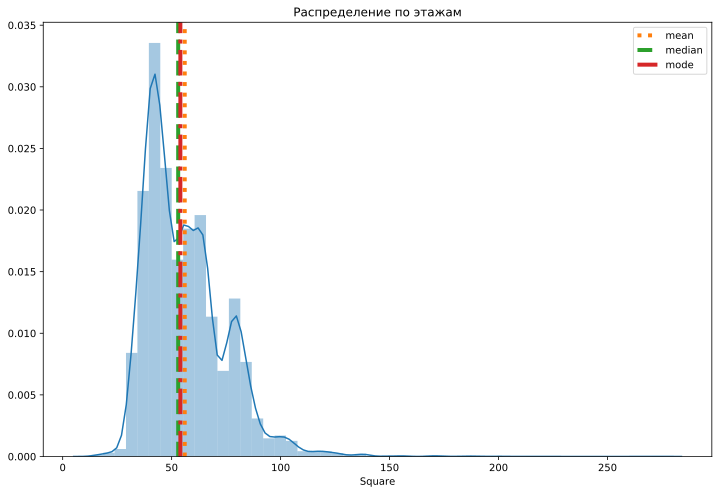

In [195]:
plt.figure(figsize = (12, 8))
sns.distplot(df['Square'])

y = np.linspace(0, 1, 100)
plt.plot([kitchen_square_target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([kitchen_square_target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([kitchen_square_target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Распределение по этажам')
plt.legend()
plt.show()